In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('lp.9ano.csv', encoding='utf-8', delimiter=';')

In [2]:
display(df)

,CIDADE,INEP,NOME DA ESCOLA,EDICAO,CLASSIFICACAO,INICIAL,INTERMEDIARIO,FINAL,PROFICIENCIA
0,FORTALEZA,23080124,DURVAL AIRES JORNALISTA EMEF,2019,Intermediario,49,60,59,264
1,FORTALEZA,23259418,ESCOLA MUNICIPAL 11 DE AGOSTO,2018,Intermediario,44,70,59,263
2,FORTALEZA,23259418,ESCOLA MUNICIPAL 11 DE AGOSTO,2019,Intermediario,58,71,63,261
3,FORTALEZA,23259418,ESCOLA MUNICIPAL 11 DE AGOSTO,2022,Intermediario,58,59,66,254
4,FORTALEZA,23065192,ESCOLA MUNICIPAL ANGELICA GURGEL,2018,Intermediario,51,71,61,272
...,...,...,...,...,...,...,...,...,...
367,FORTALEZA,23078600,ESCOLA MUNICIPAL YOLANDA QUEIROZ,2022,Critico,50,62,58,238
368,FORTALEZA,23078626,ESCOLA MUNICIPAL ZAIRA MONTEIRO GONDIM,2018,Intermediario,58,71,66,273
369,FORTALEZA,23078626,ESCOLA MUNICIPAL ZAIRA MONTEIRO GONDIM,2019,Intermediario,59,72,68,279
370,FORTALEZA,23078626,ESCOLA MUNICIPAL ZAIRA MONTEIRO GONDIM,2022,Intermediario,56,68,64,264


In [3]:
df.drop('CIDADE',axis=1,inplace=True)
df.drop('INEP',axis=1,inplace=True)
df.drop('NOME DA ESCOLA',axis=1, inplace=True)
df.drop('EDICAO',axis=1,inplace=True)
df.drop('CLASSIFICACAO',axis=1,inplace=True)

In [4]:
display(df)

,INICIAL,INTERMEDIARIO,FINAL,PROFICIENCIA
0,49,60,59,264
1,44,70,59,263
2,58,71,63,261
3,58,59,66,254
4,51,71,61,272
...,...,...,...,...
367,50,62,58,238
368,58,71,66,273
369,59,72,68,279
370,56,68,64,264


In [6]:
x = df[ df.columns[: -1] ]

In [7]:
display(x)

,INICIAL,INTERMEDIARIO,FINAL
0,49,60,59
1,44,70,59
2,58,71,63
3,58,59,66
4,51,71,61
...,...,...,...
367,50,62,58
368,58,71,66
369,59,72,68
370,56,68,64


In [8]:
y = df[ df.columns[-1: ] ]

In [9]:
y

,PROFICIENCIA
0,264
1,263
2,261
3,254
4,272
...,...
367,238
368,273
369,279
370,264


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
display(x_train.head())
display(y_train.head())

,INICIAL,INTERMEDIARIO,FINAL
140,55,67,63
360,54,67,63
280,56,69,65
30,55,64,59
337,52,64,60


,PROFICIENCIA
140,260
360,257
280,265
30,254
337,247


In [12]:
funcao_regressao = LinearRegression()
funcao_regressao.fit(x_train, y_train)

LinearRegression()

In [13]:
funcao_regressao.score(x_train, y_train)

0.7069305472715843

In [14]:

coef_a = funcao_regressao.coef_
coef_l = funcao_regressao.intercept_

In [15]:
y_pred = funcao_regressao.predict(x_test)

In [16]:
print(y_pred.shape)
print(y_test.shape)

(149, 1)
(149, 1)


In [17]:
coef_a


array([[0.41057128, 1.29386864, 0.68862416]])

In [18]:
coef_l

array([105.74613012])

formula:  y = 0,41057*A + 1,29386864*B + 0,68862*C+ 105,74613

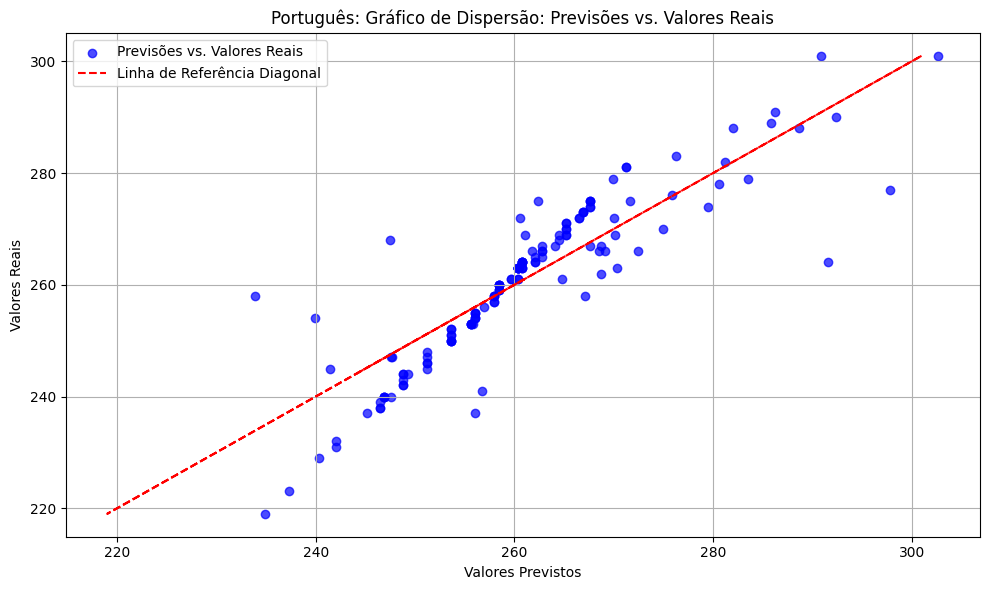

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.7, label='Previsões vs. Valores Reais')
plt.plot(y_test, y_test, linestyle='--', color='red', label='Linha de Referência Diagonal')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores estimados')
plt.title('Português: Gráfico de Dispersão: Previsões vs. Valores Reais')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE:", rmse)

RMSE: PROFICIENCIA    6.769983
dtype: float64


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 4.95


In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.abs((y_true - y_pred) / y_true)).mean() * 100
y_true = y_test.values  
y_pred = y_pred
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: {mape:.2f}%')

MAPE: 1.92%


In [67]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
model.fit(x_train, y_train)
previsoes=model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, previsoes))
print("RMSE:", rmse)

RMSE: 13.314841170038735


In [69]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, previsoes)
print(f'MAE: {mae:.2f}')

MAE: 9.62


In [70]:
def mean_absolute_percentage_error(y_true, previsoes):
    return (np.abs((y_true - previsoes) / y_true)).mean() * 100
y_true = y_test.values  
previsoes = previsoes
mape = mean_absolute_percentage_error(y_true, previsoes)
print(f'MAPE: {mape:.2f}%')

MAPE: 7.72%
